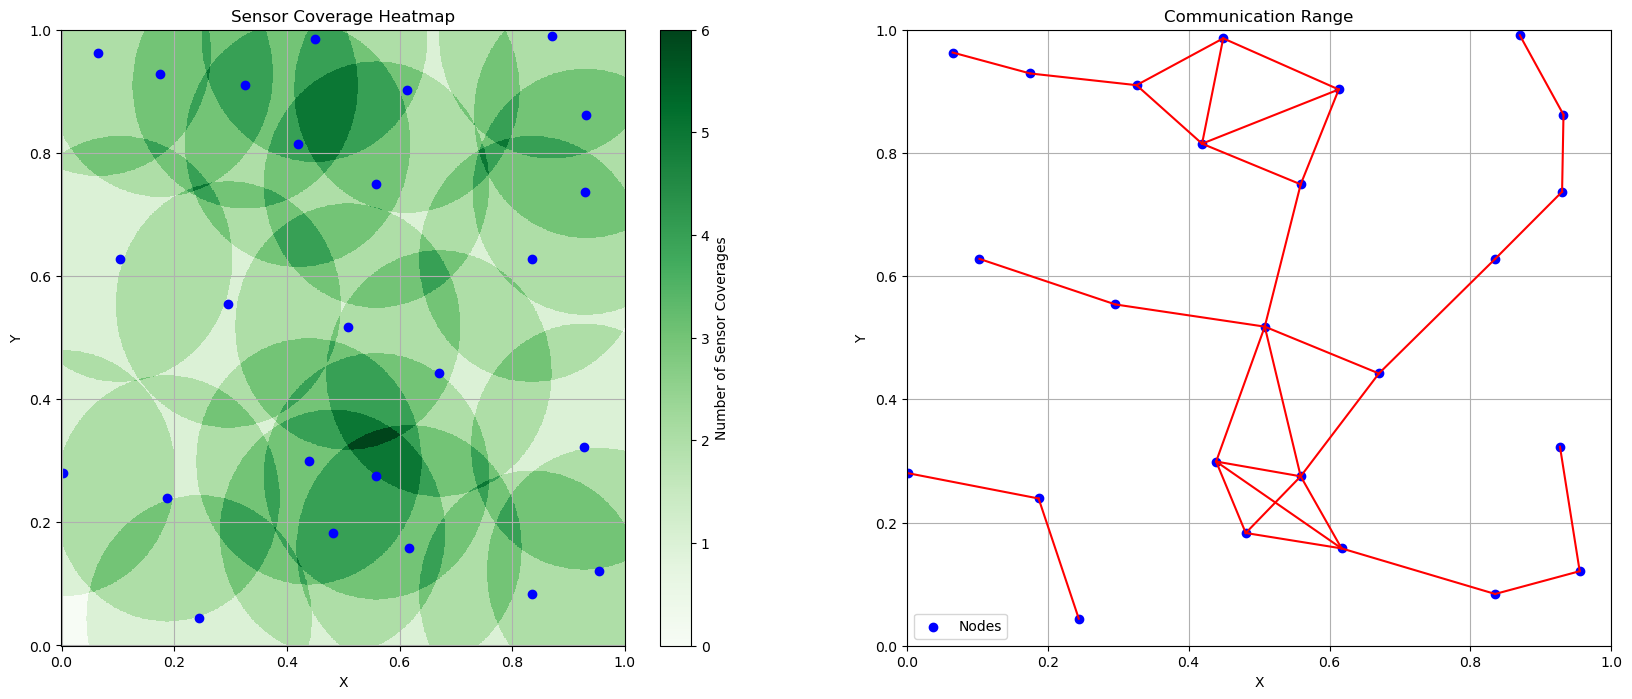

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Read node coordinates from file
with open("nodes.txt", "r") as file:
    lines = file.readlines()

# Parse coordinates
coordinates = []
for line in lines:
    x, y = map(float, line.strip().split(','))
    coordinates.append([x, y])
coordinates = np.array(coordinates)

# Environment size
L = 1.0

# Communications radius
Rc = 0.25 * L

# Sensing radius
Rs = 0.2 * L

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the nodes for communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]], 
                        [coordinates[i, 1], coordinates[j, 1]], 
                        color='red')

axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_title('Communication Range')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()
axs[1].grid(True)

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage, cmap='Greens', shading='auto')
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')

plt.show()

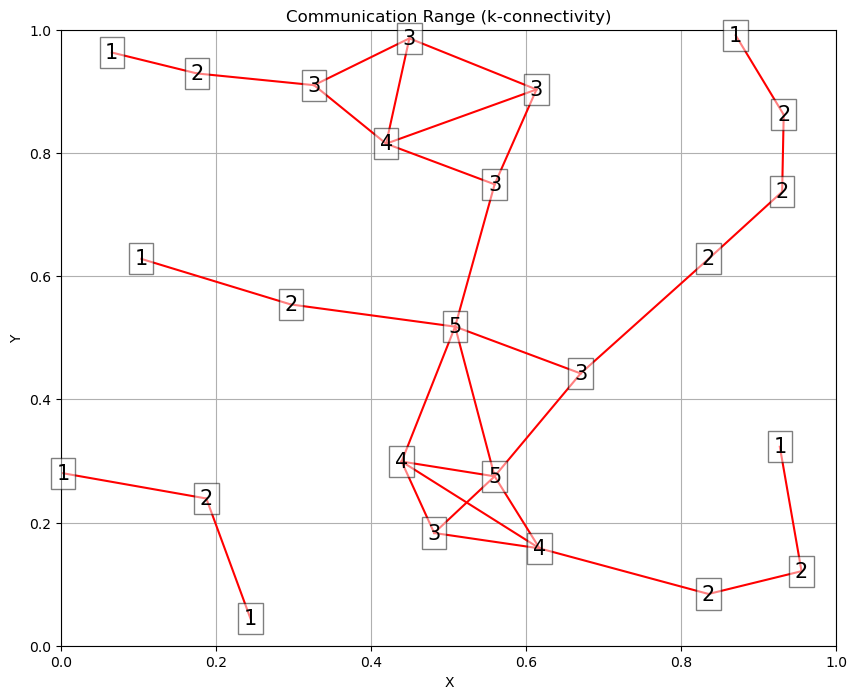

In [2]:
# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Create figure and subplot
plt.figure(figsize=(10, 8))

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            plt.plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.title('Communication Range (k-connectivity)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

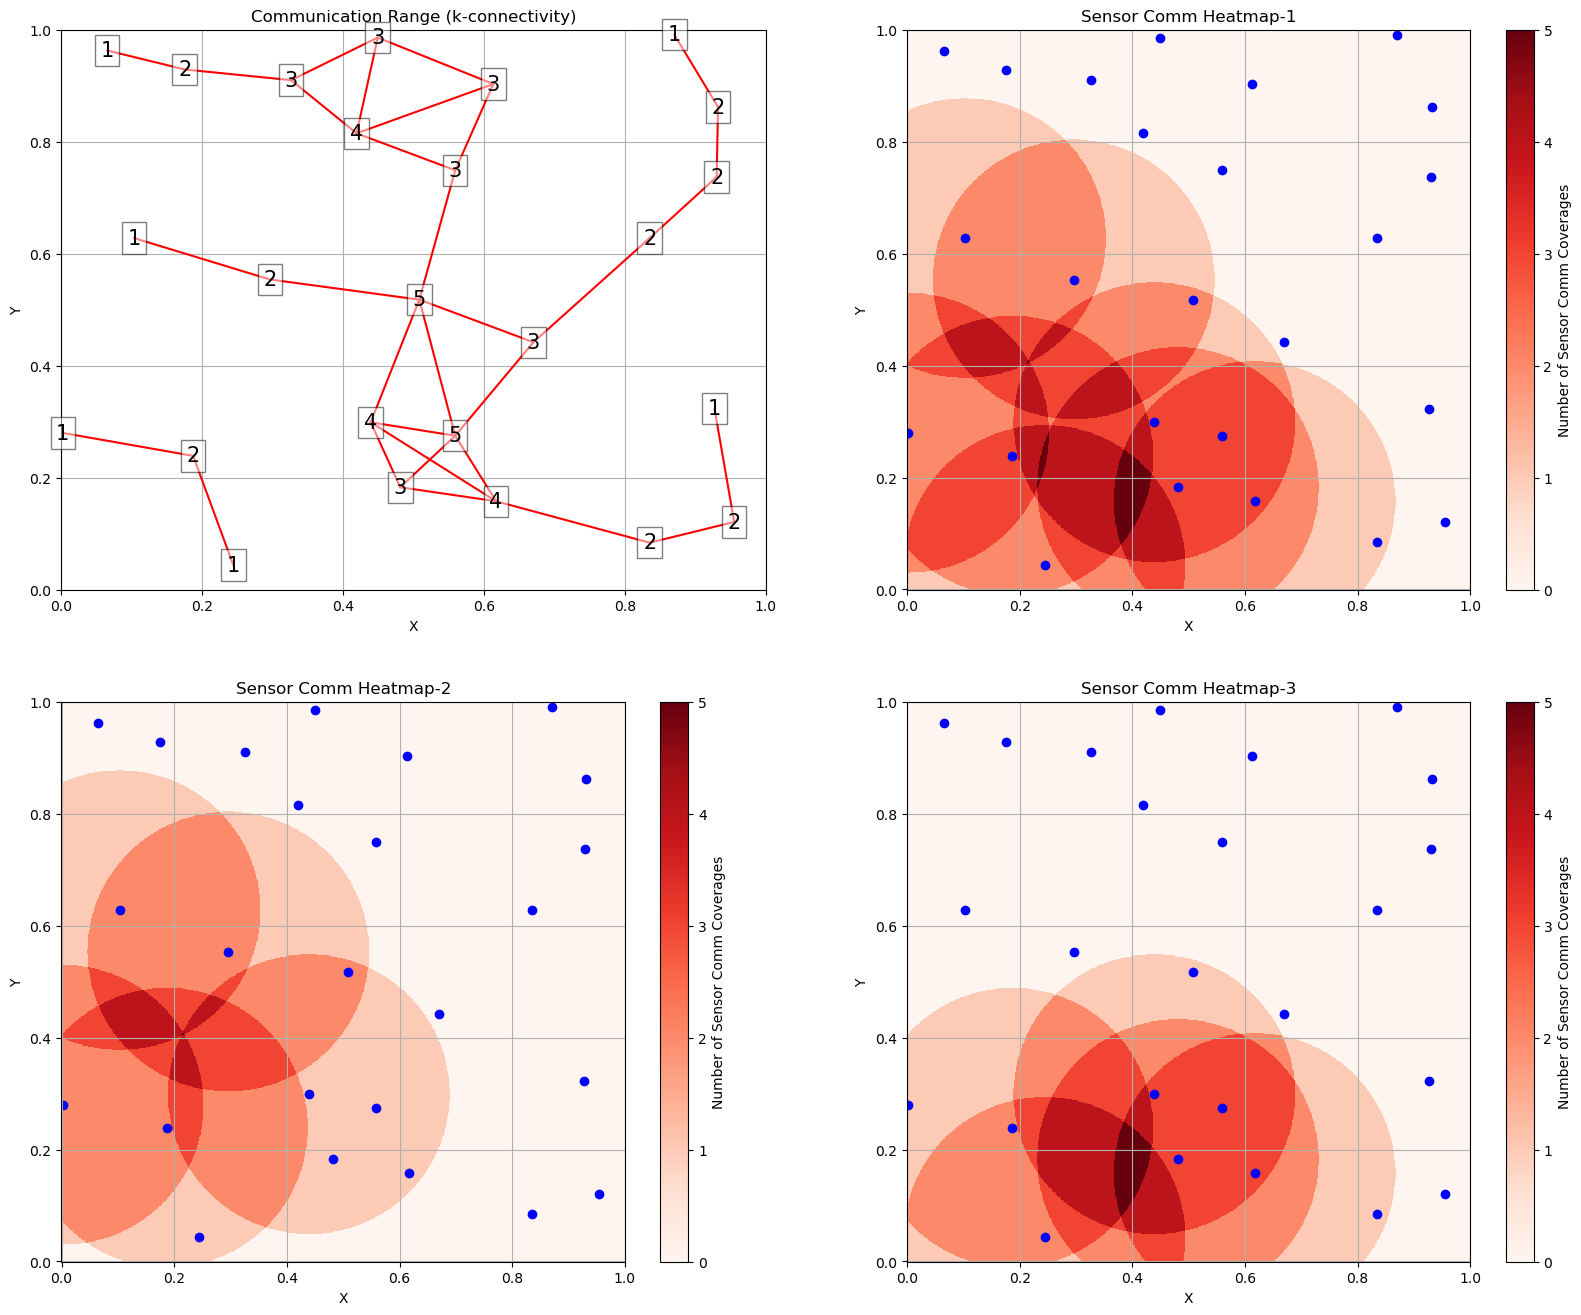

In [3]:
# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[0, 0].plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
axs[0, 0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

axs[0, 0].set_title('Communication Range (k-connectivity)')
axs[0, 0].set_xlim(0.0, 1.0)
axs[0, 0].set_ylim(0.0, 1.0)
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
axs[0, 0].grid(True)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    axs[0, 0].text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))


# Coordinates of the nodes
nodes_1 = np.array([(0.244, 0.044), (0.187, 0.239), (0.002, 0.28), (0.439, 0.299), 
                  (0.617, 0.158), (0.481, 0.183), (0.103, 0.628), (0.296, 0.554)])
# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor Communication Range
sensor_comm = np.zeros_like(X, dtype=int)
for node in nodes_1:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_comm += (dist_to_node <= Rc)

# Plot heatmap
heatmap = axs[0, 1].pcolormesh(X, Y, sensor_comm, cmap='Reds', shading='auto')
axs[0, 1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0, 1].set_title('Sensor Comm Heatmap-1')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
axs[0, 1].grid(True)

fig.colorbar(heatmap, ax=axs[0, 1], label='Number of Sensor Comm Coverages')

# Coordinates of the nodes
nodes_2 = np.array([(0.187, 0.239), (0.002, 0.28), (0.439, 0.299), 
                  (0.103, 0.628), (0.296, 0.554)])

# Calculate sensor Communication Range
sensor_comm = np.zeros_like(X, dtype=int)
for node in nodes_2:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_comm += (dist_to_node <= Rc)

# Plot heatmap
heatmap = axs[1, 0].pcolormesh(X, Y, sensor_comm, cmap='Reds', shading='auto')
axs[1, 0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[1, 0].set_title('Sensor Comm Heatmap-2')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')
axs[1, 0].grid(True)

fig.colorbar(heatmap, ax=axs[1, 0], label='Number of Sensor Comm Coverages')

# Coordinates of the nodes
nodes_3 = np.array([(0.244, 0.044), (0.187, 0.239), (0.439, 0.299), 
                  (0.617, 0.158), (0.481, 0.183)])

# Calculate sensor Communication Range
sensor_comm = np.zeros_like(X, dtype=int)
for node in nodes_3:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_comm += (dist_to_node <= Rc)

# Plot heatmap
heatmap = axs[1, 1].pcolormesh(X, Y, sensor_comm, cmap='Reds', shading='auto')
axs[1, 1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[1, 1].set_title('Sensor Comm Heatmap-3')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')
axs[1, 1].grid(True)

fig.colorbar(heatmap, ax=axs[1, 1], label='Number of Sensor Comm Coverages')

plt.show()

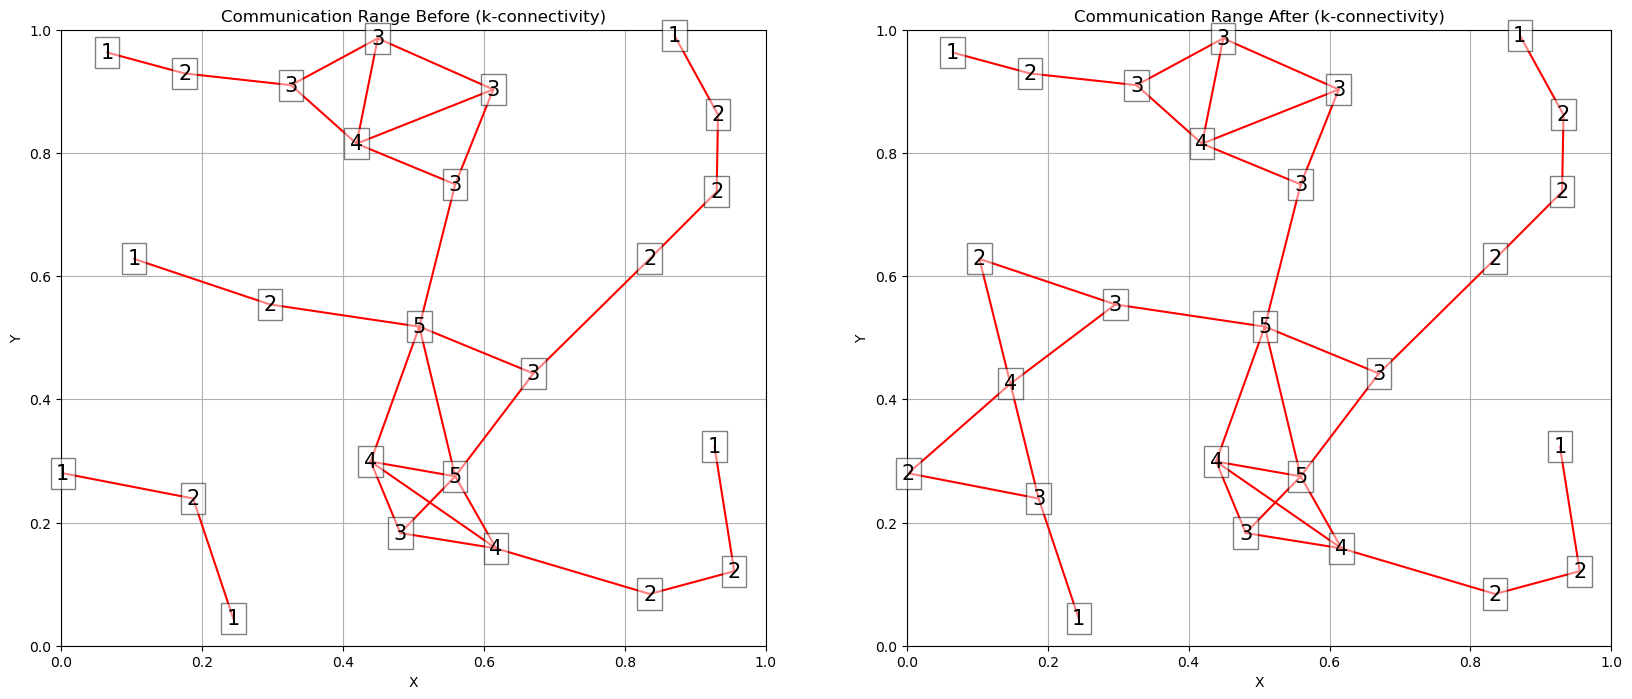

In [4]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[0].plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

axs[0].set_title('Communication Range Before (k-connectivity)')
axs[0].set_xlim(0.0, 1.0)
axs[0].set_ylim(0.0, 1.0)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    axs[0].text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))



# Add the new point
new_point = np.array([0.147, 0.42525])
coordinates = np.vstack([coordinates, new_point])

# Variable for k-connectivity
k_connectivity = np.zeros(len(coordinates), dtype=int)

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]],
                     [coordinates[i, 1], coordinates[j, 1]],
                     color='red', alpha=1.0)  # Make edges transparent

# Counting k-connectivity
for i in range(len(coordinates)):
    count = 0
    for j in range(len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc and dist != 0 :
            count += 1
    k_connectivity[i] = count

# Plotting the nodes and communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes', alpha=0.0, s=50)

axs[1].set_title('Communication Range After (k-connectivity)')
axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid(True)

# Displaying k-connectivity information
for i, (x, y) in enumerate(coordinates):
    axs[1].text(x, y, str(k_connectivity[i]), fontsize=15, ha='center', va='center', zorder=5, bbox=dict(facecolor='white', alpha=0.5))


plt.show()

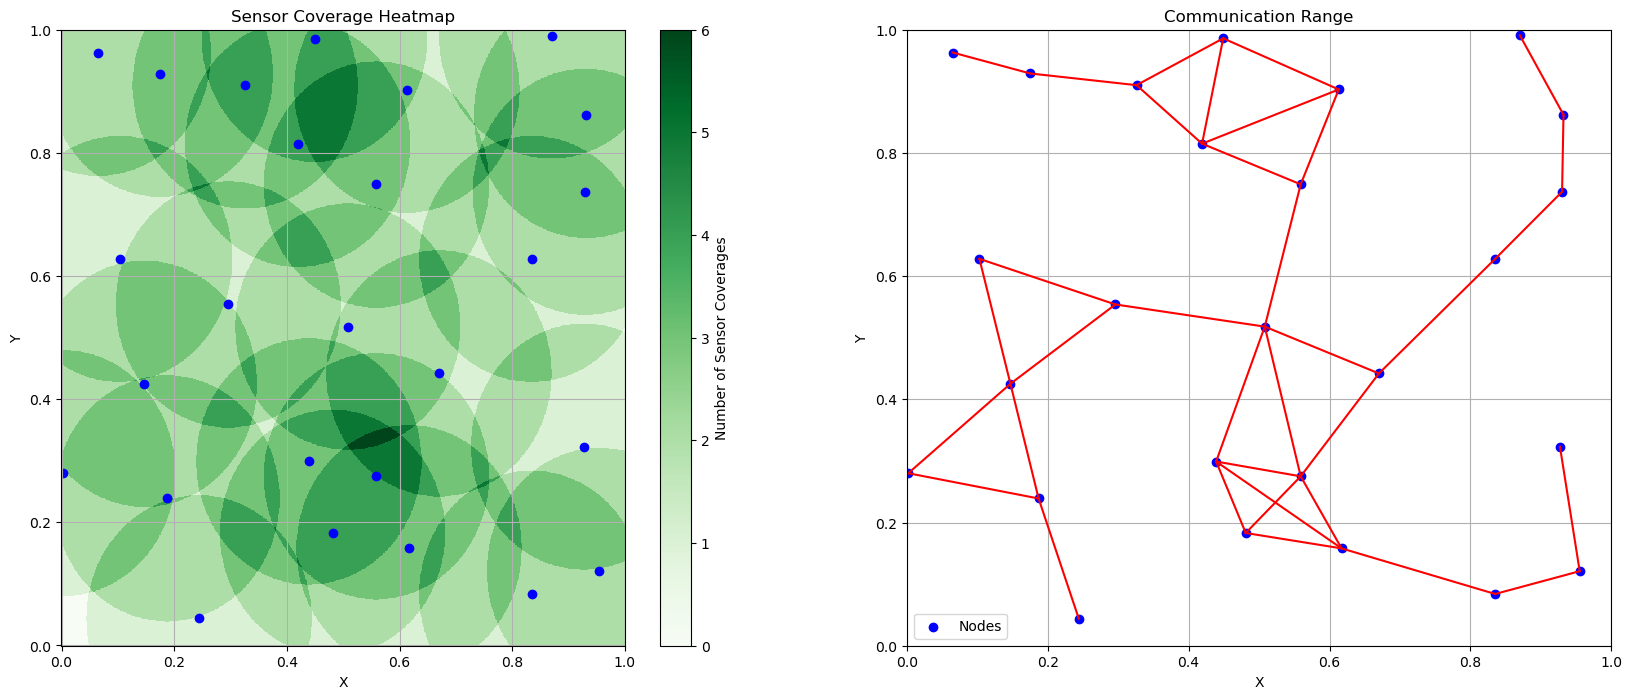

In [5]:
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the nodes for communication range
axs[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')

# Plotting edges within communication range
for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        if dist <= Rc:
            axs[1].plot([coordinates[i, 0], coordinates[j, 0]], 
                        [coordinates[i, 1], coordinates[j, 1]], 
                        color='red')

axs[1].set_xlim(0.0, 1.0)
axs[1].set_ylim(0.0, 1.0)
axs[1].set_title('Communication Range')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()
axs[1].grid(True)

# Create a grid
grid_size = 1000
x_grid = np.linspace(0, L, grid_size)
y_grid = np.linspace(0, L, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate sensor coverage
sensor_coverage = np.zeros_like(X, dtype=int)
for node in coordinates:
    dist_to_node = np.sqrt((X - node[0])**2 + (Y - node[1])**2)
    sensor_coverage += (dist_to_node <= Rs)

# Plot heatmap
heatmap = axs[0].pcolormesh(X, Y, sensor_coverage, cmap='Greens', shading='auto')
axs[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', label='Nodes')
axs[0].set_title('Sensor Coverage Heatmap')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
#axs[0].legend()
axs[0].grid(True)

fig.colorbar(heatmap, ax=axs[0], label='Number of Sensor Coverages')

plt.show()